In [15]:
from sys import path
path.append('../')

import cv2
import matplotlib.pyplot as plt
import numpy as np

from src.algorithems import PoseEstimator

plt.rcParams['figure.figsize'] = [15, 10]

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pe = PoseEstimator()

/home/ofir/miniconda3/envs/TheSnitcher/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
im_path = '../data/1_DJI_0277_frames/1_DJI_0277_frame_1.jpg'

In [4]:
im = cv2.imread(im_path)
prediction = pe.get_full_prediction(im)

/home/ofir/miniconda3/envs/TheSnitcher/lib/python3.8/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


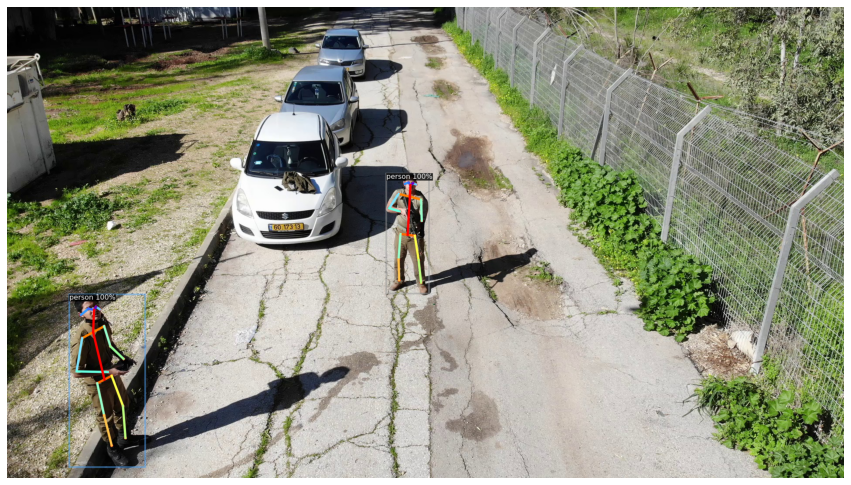

In [5]:
fig, axs = plt.subplots()
pe.draw_prediction_on_image(im, prediction, axs)

# pos = prediction.pred_keypoints[0, :, :2]
# axs.scatter(pos[:, 0], pos[:, 1])

plt.show()

In [13]:
import pickle

with open('../outputs/1_DJI_0277_preds.pkl', 'br') as f:
    predictions = pickle.load(f)

In [33]:
num_ppl = predictions[0].pred_keypoints.shape[0]

left_wrist = np.zeros([len(predictions), 2])
l_viz = np.zeros(len(predictions))
right_wrist = np.zeros([len(predictions), 2])
r_viz = np.zeros(len(predictions))

for frame_num, pred in enumerate(predictions):
    left_wrist[frame_num] = pred.pred_keypoints[1, 9, :2]
    l_viz[frame_num] = pred.pred_keypoints[1, 9, 2]
    right_wrist[frame_num] = pred.pred_keypoints[1, 10, :2]
    r_viz[frame_num] = pred.pred_keypoints[1, 9, 2]
    
#     break
    

In [29]:
hand_dist = np.sqrt(np.sum((left_wrist - right_wrist) ** 2, axis=1))

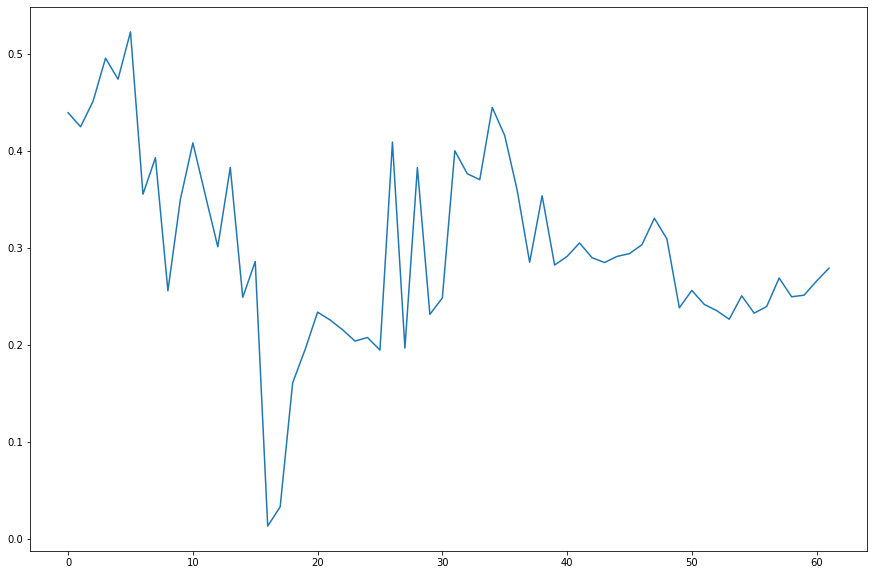

In [35]:
plt.plot(r_viz)